In [2]:
!pip install tensorflow-hub


     ---------------------------------------- 85.4/85.4 kB 1.2 MB/s eta 0:00:00


In [4]:
!pip install tensorflow-datasets


     ---------------------------------------- 5.0/5.0 MB 176.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 430.5/430.5 kB 266.3 kB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 258.7 kB/s eta 0:00:00
     ------------------------------------ 101.5/101.5 kB 201.4 kB/s eta 0:00:00
     ------------------------------------ 140.6/140.6 kB 287.8 kB/s eta 0:00:00
     ------------------------------------ 230.9/230.9 kB 313.8 kB/s eta 0:00:00
     ------------------------------------ 904.2/904.2 kB 172.3 kB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=ad289410b32df9bd58489faee2f6bc245150317d3228246532f4e3ca0b6116e1
  Stored in directory: c:\users\dcl\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise
  Attempting uninstall: protobuf
 

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DCL\\AppData\\Roaming\\Python\\Python39\\site-packages\\google\\~rotobuf\\internal\\_api_implementation.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
# import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [9]:
import keras
from keras.applications.mobilenet import MobileNet

from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Activation
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [10]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [11]:
train = train_datagen.flow_from_directory(
    'D:\rose lelf dataset\Split_DATASET\Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    'D:\rose lelf dataset\Split_DATASET\Validation',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    'D:\rose lelf dataset\Split_DATASET\Test',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'D:\rose lelf dataset\\Split_DATASET\\Train'

In [7]:
MobileNetv2 = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

9406464/9406464 [==============================] - 2s 0us/step


In [8]:
MobileNetv2.trainable = False

In [9]:

model = tf.keras.models.Sequential([
  MobileNetv2,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=3, activation='softmax'),
])

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1024)              64226304  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 3)                 1539      
                                                        

In [11]:

history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 100
)

Epoch 1/100
315/657 [=============>................] - ETA: 2:06:09 - loss: 0.9427 - accuracy: 0.8438

UnknownError: ignored

In [ ]:

# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

6/6 [==============================] - 92s 18s/step - loss: 0.3661 - accuracy: 0.8859
Accuracy: 0.885869562625885
Loss: 0.3660734295845032


In [ ]:
test.class_indices

{'Black Spot': 0, 'Downy Mildew': 1, 'Fresh Leaf': 2}

In [ ]:

import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['Black Spot', 'Downy Mildew', 'Fresh Leaf']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

6/6 [==============================] - 16s 2s/step
              precision    recall  f1-score   support

  Black Spot       0.83      0.87      0.85        63
Downy Mildew       0.93      1.00      0.96        40
  Fresh Leaf       0.91      0.84      0.87        81

    accuracy                           0.89       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.89      0.89      0.89       184



<Axes: >

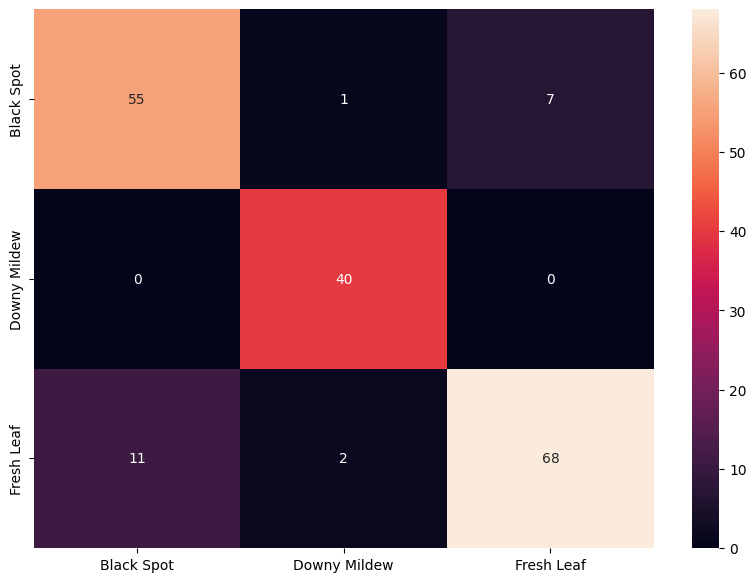

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in  ['Black Spot', 'Downy Mildew', 'Fresh Leaf']],
                  columns = [i for i in  ['Black Spot', 'Downy Mildew', 'Fresh Leaf']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

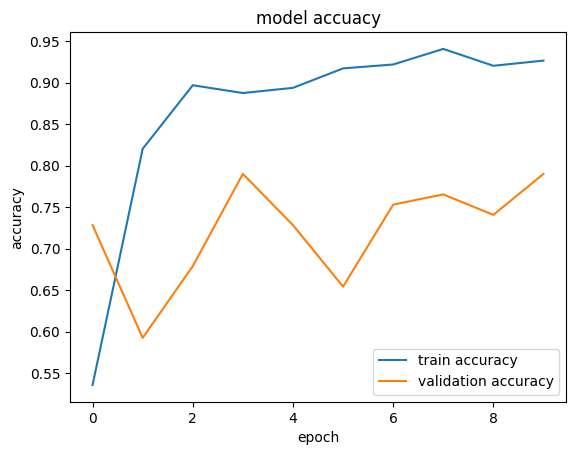

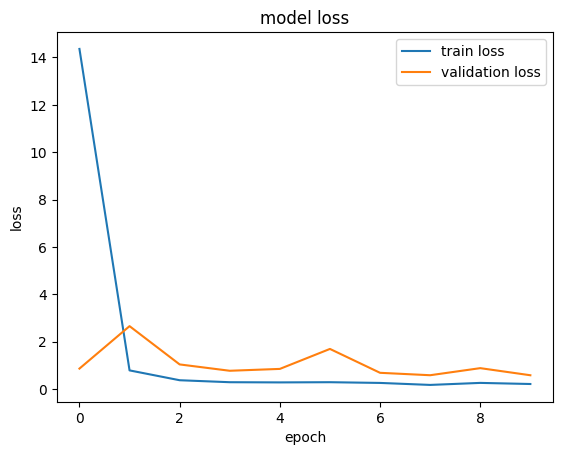

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()